# Generative Adversarial Networks (GANs)



## Setup

In [3]:
import torch
import torch.nn as nn
from torch.nn import init
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets

import numpy as np

import matplotlib
# Force matplotlib to not use any Xwindows backend.
# matplotlib.use('Agg')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from torchvision.utils import save_image
# from torchvision.datasets import MNIST
import os


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


num_epochs = 100
batch_size = 128
# for testing, batch_size = 12
batch_size = 36
learning_rate = 1e-3

crop_img_width = 28
# crop_img_width = 168
channel_size = 3



# %matplotlib inline
# plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

# def show_images(images):
#     images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
#     sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
#     sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

#     fig = plt.figure(figsize=(sqrtn, sqrtn))
#     gs = gridspec.GridSpec(sqrtn, sqrtn)
#     gs.update(wspace=0.05, hspace=0.05)

#     for i, img in enumerate(images):
#         ax = plt.subplot(gs[i])
#         plt.axis('off')
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
#         ax.set_aspect('equal')
#         plt.imshow(img.reshape([sqrtimg,sqrtimg]))
#     return 

# def preprocess_img(x):
#     return 2 * x - 1.0

# def deprocess_img(x):
#     return (x + 1.0) / 2.0

# def rel_error(x,y):
#     return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

# def count_params(model):
#     """Count the number of parameters in the current TensorFlow graph """
#     param_count = np.sum([np.prod(p.size()) for p in model.parameters()])
#     return param_count

# answers = np.load('gan-checks-tf.npz')

## Dataset


In [4]:
# # Data augmentation and normalization for training
# # Just normalization for validation
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.RandomSizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
#     'val': transforms.Compose([
#         transforms.Scale(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
# }

# transform = transforms.Compose([
#              transforms.Scale((32,32)),
#              transforms.ToTensor(),
#              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])




# data_dir = '../dataset_small'
# image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
#                                           data_transforms[x])
#                   for x in []}
# dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
#                                              shuffle=True, num_workers=4)
#               for x in []}


# trainset = dset.ImageFolder(root="imgs",transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True,         num_workers=2)



# dataset_sizes = {x: len(image_datasets[x]) for x in []}
# class_names = image_datasets[].classes

# use_gpu = torch.cuda.is_available()




img_transform = transforms.Compose([
    transforms.RandomCrop(crop_img_width),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# test
dataset = datasets.ImageFolder(root='../dataset_small', transform=img_transform)

# real
# dataset = datasets.ImageFolder(root='../dataset_small', transform=img_transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)





# class ChunkSampler(sampler.Sampler):
#     """Samples elements sequentially from some offset. 
#     Arguments:
#         num_samples: # of desired datapoints
#         start: offset where we should start selecting from
#     """
#     def __init__(self, num_samples, start=0):
#         self.num_samples = num_samples
#         self.start = start

#     def __iter__(self):
#         return iter(range(self.start, self.start + self.num_samples))

#     def __len__(self):
#         return self.num_samples

# NUM_TRAIN = 50000
# NUM_VAL = 5000

# NOISE_DIM = 96
# batch_size = 128

# mnist_train = dset.MNIST('./cs231n/datasets/MNIST_data', train=True, download=True,
#                            transform=T.ToTensor())
# loader_train = DataLoader(mnist_train, batch_size=batch_size,
#                           sampler=ChunkSampler(NUM_TRAIN, 0))

# mnist_val = dset.MNIST('./cs231n/datasets/MNIST_data', train=True, download=True,
#                            transform=T.ToTensor())
# loader_val = DataLoader(mnist_val, batch_size=batch_size,
#                         sampler=ChunkSampler(NUM_VAL, NUM_TRAIN))


# imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()
# show_images(imgs)

## Show images

In [5]:
# get a batch of images
inputs = dataloader.__iter__().next()
# inputs = next(iter(dataloader))


(36, 2352)


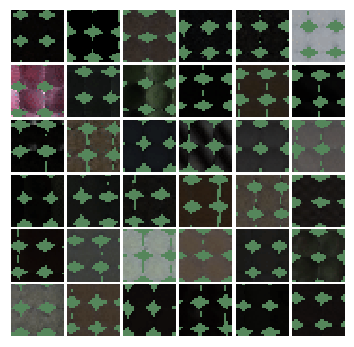

In [7]:

def show_images(images):
    # images = images * 255.0
    img_max = np.max(images)
    img_min = np.min(images)
    images = 255.0 * (images - img_min) / (img_max - img_min)
    
    # print(images.shape)
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    print(images.shape)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1] / 3)))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        img = img.reshape([3,sqrtimg,sqrtimg])
        img = np.swapaxes(np.swapaxes(img,1,2),0,2)
        plt.imshow(img.astype('uint8'))
    plt.show()
    # plt.pause(0.001)
    return 




def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
        plt.pause(0.001)  # pause a bit so that plots are updated

    
def imshow2(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
# inputs, classes = next(iter(dataloaders['train']))
# inputs = next(iter(dataloader))


# Make a grid from batch
# out = torchvision.utils.make_grid(inputs[0])

# imshow2(out)
    
    

# Get a batch of training data
# inputs = next(iter(dataloader))
# 128x3x10x10
# 128

# print(inputs[0])

to_show = inputs[0].view(batch_size, crop_img_width*crop_img_width*channel_size).numpy().squeeze()
# print(to_show)
show_images(to_show)

# Make a grid from batch
# print("imshow")
# out = torchvision.utils.make_grid(inputs[0])
# imshow(out)


## Auto encoder class

In [6]:
# FOR SCALING UP 

# class autoencoder(nn.Module):
#     def __init__(self):
#         super(autoencoder, self).__init__()
#         self.encoder = nn.Sequential(
#             # input: batch = 36, channel = 3, size = 168x168
#             nn.Conv2d(3, 16, 5, stride=3, padding=1), # b, 16, 56, 56
#             nn.ReLU(True),
#             nn.MaxPool2d(2, stride=2), # b, 16, 28, 28
#             nn.Conv2d(16, 16, 3, stride=3, padding=1),  # b, 16, 10, 10
#             nn.ReLU(True),
#             nn.MaxPool2d(2, stride=2),  # b, 16, 5, 5
#             nn.Conv2d(16, 8, 3, stride=2, padding=1),  # b, 8, 3, 3
#             nn.ReLU(True),
#             nn.MaxPool2d(2, stride=1)  # b, 8, 2, 2
#         )
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(8, 16, 3, stride=2),  # b, 16, 5, 5
#             nn.ReLU(True),
#             nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  # b, 8, 15, 15
#             nn.ReLU(True),
#             nn.ConvTranspose2d(8, 8, 2, stride=2, padding=1),  # b, 1, 28, 28
#             nn.ReLU(True),
#             nn.ConvTranspose2d(8, 3, 8, stride=6, padding=1),
#             nn.Tanh()
#         )

#     def forward(self, x):
#         x = self.encoder(x)
#         # print(x)
#         x = self.decoder(x)
#         # print(x)
#         return x
    
# CURRENT USAGE 
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=3, padding=1),  # b, 16, 10, 10
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # b, 16, 5, 5
            nn.Conv2d(16, 8, 3, stride=2, padding=1),  # b, 8, 3, 3
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)  # b, 8, 2, 2
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2),  # b, 16, 5, 5
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  # b, 8, 15, 15
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 8, 2, stride=2, padding=1),  # b, 1, 28, 28
            nn.ReLU(True),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        # print(x)
        x = self.decoder(x)
        # print(x)
        return x
        
    
#  168 - 5 + 12 ) / 11 + 1
#  175 / 11
#     F = 11
#     P = 6
#     F + 2P = 23
    
#     = 145
#     S = 5
#    ( 168 - F + 2P ) / S = 27    
    
#    W - F  = 163
# ( + 2 ) / 3 + 1 = 56

# ( 28 - 3 + 2 ) / 3 + 1
# ( 27 ) / 3 + 1


# * Accepts a volume of size W1 x H1 x D1
# * Requires four hyperparameters:
#     * Number of filters K
#     * their spatial extent F
#     * the stride S
#     * the amount of zero padding P
# * Produces a volume of size W2 x h2 x d2
# * where:
#     * W2 = (W1 - F +2P) / S + 1
#     * H2 = (H1 - F + 2P) / S + 1 (i.e. width and height are computed equally by symmetry)
#     * D2 = K
# * With parameter sharing, it introduces F⋅F⋅D1 K weights and K biases.
# * In the output volume, the d-th depth slice (of size W2 x H2)  is the result of performing a valid convolution of the d-th filter over the input volume with stride of S and then offset by d-th bias 
    
    
    
# def sample_noise(batch_size, dim):
#     """
#     Generate a PyTorch Tensor of uniform random noise.

#     Input:
#     - batch_size: Integer giving the batch size of noise to generate.
#     - dim: Integer giving the dimension of noise to generate.
    
#     Output:
#     - A PyTorch Tensor of shape (batch_size, dim) containing uniform
#       random noise in the range (-1, 1).
#     """
#     pass


## Noise

In [6]:
def sample_noise(batch_size, dim):
    """
    Generate a PyTorch Tensor of uniform random noise.

    Input:
    - batch_size: Integer giving the batch size of noise to generate.
    - dim: Integer giving the dimension of noise to generate.
    
    Output:
    - A PyTorch Tensor of shape (batch_size, dim) containing uniform
      random noise in the range (-1, 1).
    """
    noise = torch.rand(batch_size, dim) * 2 - 1
    return noise

# def test_sample_noise():
#     batch_size = 3
#     dim = 4
#     torch.manual_seed(231)
#     z = sample_noise(batch_size, dim)
#     np_z = z.cpu().numpy()
#     assert np_z.shape == (batch_size, dim)
#     assert torch.is_tensor(z)
#     assert np.all(np_z >= -1.0) and np.all(np_z <= 1.0)
#     assert np.any(np_z < 0.0) and np.any(np_z > 0.0)
#     print('All tests passed!')
    
# test_sample_noise()

## Flatten


## CPU / GPU
By default all code will run on CPU. GPUs are not needed for this assignment, but will help you to train your models faster. If you do want to run the code on a GPU, then change the `dtype` variable in the following cell.

In [8]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor ## UNCOMMENT THIS LINE IF YOU'RE ON A GPU!


epoch [1/100], loss:0.1038
(3, 84672)


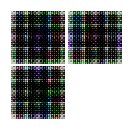

epoch [2/100], loss:0.0721
epoch [3/100], loss:0.0544
epoch [4/100], loss:0.0224
epoch [5/100], loss:0.0361
epoch [6/100], loss:0.0421
epoch [7/100], loss:0.0371
epoch [8/100], loss:0.0384
epoch [9/100], loss:0.0334
epoch [10/100], loss:0.0479
epoch [11/100], loss:0.0477
(3, 84672)


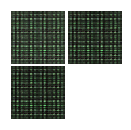

epoch [12/100], loss:0.0500
epoch [13/100], loss:0.0366
epoch [14/100], loss:0.0298
epoch [15/100], loss:0.0364
epoch [16/100], loss:0.0412
epoch [17/100], loss:0.0293
epoch [18/100], loss:0.0378
epoch [19/100], loss:0.0346
epoch [20/100], loss:0.0422
epoch [21/100], loss:0.0431
(3, 84672)


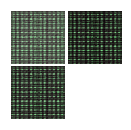

epoch [22/100], loss:0.0642
epoch [23/100], loss:0.0338
epoch [24/100], loss:0.0363
epoch [25/100], loss:0.0298
epoch [26/100], loss:0.0335
epoch [27/100], loss:0.0335
epoch [28/100], loss:0.2137
epoch [29/100], loss:0.0851
epoch [30/100], loss:0.0282
epoch [31/100], loss:0.0446
(3, 84672)


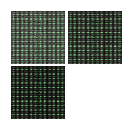

epoch [32/100], loss:0.0507


KeyboardInterrupt: 

In [9]:
model = autoencoder().type(dtype) # .cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                             weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = Variable(img).type(dtype)
        # ===================forward=====================
        output = model(img)
        # print(output)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.data[0]))
    if epoch % 10 == 0:
        # output.data?
        imgs_numpy = output.data.cpu().numpy()
        show_images(imgs_numpy[0:16])
        plt.show()
        # pic = to_img(output.cpu().data)
        # save_image(pic, './dc_img/image_{}.png'.format(epoch))

torch.save(model.state_dict(), './conv_autoencoder.pth')


In [ ]:
# def run_a_gan(D, G, D_solver, G_solver, discriminator_loss, generator_loss, show_every=250, 
#               batch_size=128, noise_size=96, num_epochs=10):
#     """
#     Train a GAN!
    
#     Inputs:
#     - D, G: PyTorch models for the discriminator and generator
#     - D_solver, G_solver: torch.optim Optimizers to use for training the
#       discriminator and generator.
#     - discriminator_loss, generator_loss: Functions to use for computing the generator and
#       discriminator loss, respectively.
#     - show_every: Show samples after every show_every iterations.
#     - batch_size: Batch size to use for training.
#     - noise_size: Dimension of the noise to use as input to the generator.
#     - num_epochs: Number of epochs over the training dataset to use for training.
#     """
#     iter_count = 0
#     for epoch in range(num_epochs):
#         for x, _ in loader_train:
#             if len(x) != batch_size:
#                 continue
#             D_solver.zero_grad()
#             real_data = Variable(x).type(dtype)
#             logits_real = D(2* (real_data - 0.5)).type(dtype)

#             g_fake_seed = Variable(sample_noise(batch_size, noise_size)).type(dtype)
#             fake_images = G(g_fake_seed).detach()
#             logits_fake = D(fake_images.view(batch_size, 1, 28, 28))

#             d_total_error = discriminator_loss(logits_real, logits_fake)
#             d_total_error.backward()        
#             D_solver.step()

#             G_solver.zero_grad()
#             g_fake_seed = Variable(sample_noise(batch_size, noise_size)).type(dtype)
#             fake_images = G(g_fake_seed)

#             gen_logits_fake = D(fake_images.view(batch_size, 1, 28, 28))
#             g_error = generator_loss(gen_logits_fake)
#             g_error.backward()
#             G_solver.step()

#             if (iter_count % show_every == 0):
#                 print('Iter: {}, D: {:.4}, G:{:.4}'.format(iter_count,d_total_error.data[0],g_error.data[0]))
#                 imgs_numpy = fake_images.data.cpu().numpy()
#                 show_images(imgs_numpy[0:16])
#                 plt.show()
#                 print()
#             iter_count += 1